In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import MoS2_data_cleaning as mo
import os
import re

In [2]:
directory_path = "C:\\Users\\sophi\\Box\\MoS2Project\\2025-10-18-CVD\\DoubleGate\\IdVd"  # Replace with your directory path
if not os.path.isdir(f'{directory_path}\sorted'):
    os.mkdir(f'{directory_path}\sorted')
file_list = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

In [3]:
file_first = file_list[0]
df = mo.read_csv_direction(file_first)
df

,VD,VG,ID,IG,sqrtID,VBG,forward
0,0.000,-1.5,0.000025,-9.679920e-08,0.000005,,True
1,0.015,-1.5,0.000013,-9.679840e-08,0.000004,,True
2,0.030,-1.5,0.000012,-9.681880e-08,0.000003,,True
3,0.045,-1.5,0.000015,-9.684340e-08,0.000004,,True
4,0.060,-1.5,0.000012,-9.685560e-08,0.000003,,True
...,...,...,...,...,...,...,...
1409,0.060,1.5,0.054129,1.200000e-07,0.000233,,False
1410,0.045,1.5,0.040285,1.200000e-07,0.000201,,False
1411,0.030,1.5,0.027494,1.199800e-07,0.000166,,False
1412,0.015,1.5,0.013501,1.201000e-07,0.000116,,False


In [4]:
df_reshaped = mo.reshape_table_by_VG(df)
df_reshaped.columns

MultiIndex([(' ID', -1.5),
            (' ID', -1.0),
            (' ID', -0.5),
            (' ID',  0.0),
            (' ID',  0.5),
            (' ID',  1.0),
            (' ID',  1.5)],
           names=[None, ' VG'])

In [5]:
df_sorted = mo.reorder_by_VD(df_reshaped)
df_new = df_sorted.reset_index().set_index(' VD')
df_new

,forward,V_G = -1.5,V_G = -1.0,V_G = -0.5,V_G = 0.0,V_G = 0.5,V_G = 1.0,V_G = 1.5
VD,,,,,,,,
0.000,False,3.230000e-06,8.000000e-08,-3.640000e-06,-0.000007,-0.000173,-0.000210,-0.000546
0.015,False,6.180000e-06,5.800000e-07,-3.980000e-06,0.000029,0.003298,0.007951,0.013501
0.030,False,3.990000e-06,1.100000e-06,-5.440000e-06,0.000054,0.006739,0.015488,0.027494
0.045,False,2.390000e-06,1.540000e-06,-6.390000e-06,0.000072,0.009360,0.023123,0.040285
0.060,False,1.000000e-08,2.020000e-06,-7.690000e-06,0.000083,0.012496,0.030525,0.054129
...,...,...,...,...,...,...,...,...
0.060,True,1.222000e-05,3.700000e-06,1.000000e-07,0.000119,0.012943,0.031696,0.056291
0.045,True,1.452000e-05,5.160000e-06,7.300000e-07,0.000103,0.009855,0.024331,0.042934
0.030,True,1.217000e-05,6.050000e-06,9.200000e-07,0.000078,0.006946,0.016514,0.028864


In [6]:
df_new.drop(columns=' forward',inplace=True)
df_new.columns

Index(['V_G = -1.5', 'V_G = -1.0', 'V_G = -0.5', 'V_G = 0.0', 'V_G = 0.5',
       'V_G = 1.0', 'V_G = 1.5'],
      dtype='object')

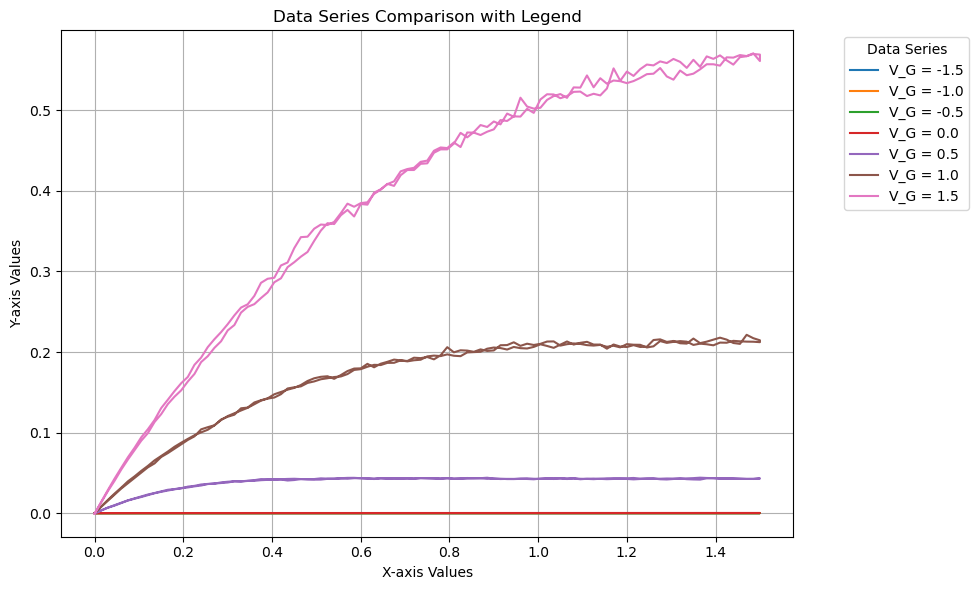

In [7]:
ax = df_new.plot( kind='line', figsize=(10, 6))

# 3. Add labels and title
plt.title('Data Series Comparison with Legend')
plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')

# 4. Customize and display the legend
plt.legend(title='Data Series', loc='upper right', bbox_to_anchor=(1.25, 1)) # Example of placing legend outside
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels/legend from overlapping
plt.show()

In [8]:
for file in file_list:
    print(f'{file} started')
    
    df = mo.read_csv_direction(file)
    df_reshaped = mo.reshape_table_by_VG(df)
    df_sorted = mo.reorder_by_VD(df_reshaped)
    df_new = df_sorted.reset_index().set_index(' VD')
    df_new.drop(columns=' forward',inplace=True)
    filename =directory_path + '\\sorted\\' + file[62:]
    df_new.to_csv(filename, index=True)
    

C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R11C2-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R11C3-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R11C4-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R11C5-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R7C10-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R7C10-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R7C11-B__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
C:\Users\sophi\Box\MoS2Project\2025-10-18-CVD\DoubleGate\IdVd\R7C11-T__ExfoliatedMoS2_TGIdVd_DoubleGate.csv started
